In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from citipy import citipy
from scipy.spatial import KDTree

# Import the OpenWeatherMap API key
from api_keys import weather_api_key


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# combine cities and lattitudes and longitudes to one list to be easily
# converted as dataframe and easily call latitude and longitude for url
city_lat_long = list(zip(cities,lat_lngs))

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [3]:
# generate the url to call the openweather API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | keflavik
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | selkirk
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | ambalangoda
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | dudinka
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | bom jardim
Processing Record 19 of Set 1 | santiago de cao
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | afaahiti
Processing Record 22 of Set 1 | sassnitz
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,47.48,82,78,13.80,CL,1730176691
1,port-aux-francais,-49.3500,70.2167,36.79,82,96,20.00,TF,1730176519
2,keflavik,64.0049,-22.5624,41.43,87,75,24.16,IS,1730176694
3,margaret river,-33.9500,115.0667,73.09,57,15,15.26,AU,1730176695
4,weno,7.4515,151.8468,89.55,70,40,9.22,FM,1730176696


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,47.48,82,78,13.80,CL,1730176691
1,port-aux-francais,-49.3500,70.2167,36.79,82,96,20.00,TF,1730176519
2,keflavik,64.0049,-22.5624,41.43,87,75,24.16,IS,1730176694
3,margaret river,-33.9500,115.0667,73.09,57,15,15.26,AU,1730176695
4,weno,7.4515,151.8468,89.55,70,40,9.22,FM,1730176696


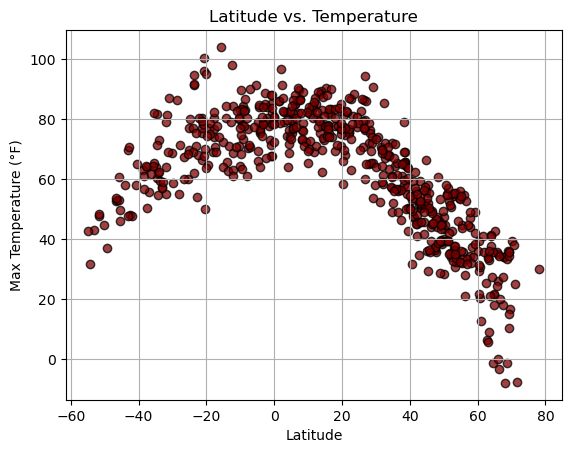

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],c='maroon',edgecolors='black',alpha=.75)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Temperature')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

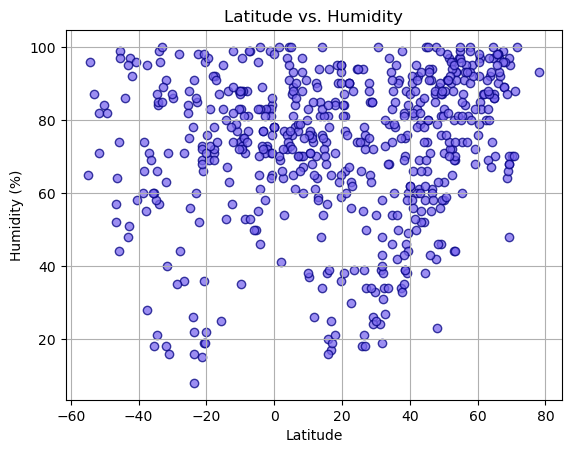

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],c='mediumslateblue',edgecolors='navy',alpha=.75)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

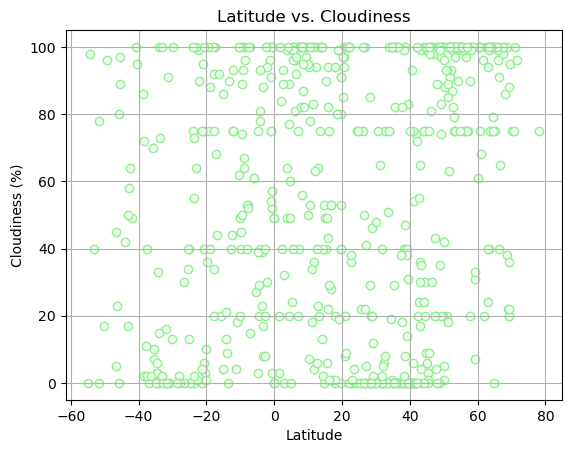

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],c='honeydew',edgecolors='lightgreen',alpha=1)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

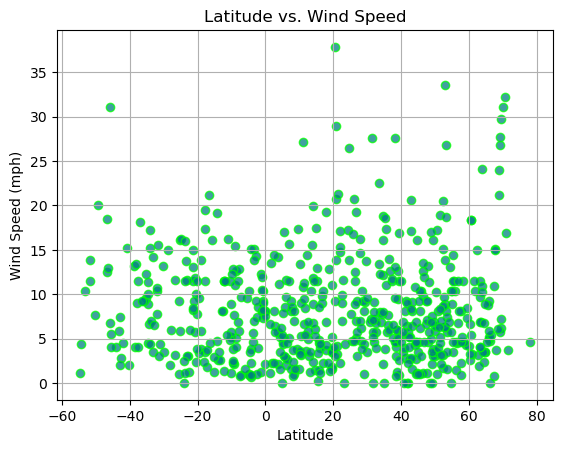

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],c='teal',edgecolors='lime',alpha=.75)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [39]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    stdev = np.std(y_values)
    sem = stats.sem(y_values)
    # print linear regression calculations and slope formula to confirm accuracy
    print(
        f'\n'
        f'The r^2-value is: {rvalue**2}.\n'
        f'The slope of the regression is: {slope}.\n' 
        f'The inercept of the regression is: {intercept}.\n' 
        f'The rvalue of the regression is: {rvalue}.\n' 
        f'The pvalue of the regression is: {pvalue}.\n' 
        f'The Standard Deviation is: {stdev}.\n' 
        f'The Standard Error is: {stderr}.\n'
        f'The Standard Error of the mean is: {sem}.\n'
        f'The regression line equation is: {line_eq}.\n'
    )
    return regress_values, line_eq

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,keflavik,64.0049,-22.5624,41.43,87,75,24.16,IS,1730176694
4,weno,7.4515,151.8468,89.55,70,40,9.22,FM,1730176696
6,talnakh,69.4865,88.3972,16.77,95,95,7.20,RU,1730176699
7,albany,42.6001,-73.9662,34.63,69,24,2.64,US,1730176700
8,selkirk,50.1436,-96.8845,47.17,71,42,3.00,CA,1730176701


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,47.48,82,78,13.80,CL,1730176691
1,port-aux-francais,-49.3500,70.2167,36.79,82,96,20.00,TF,1730176519
3,margaret river,-33.9500,115.0667,73.09,57,15,15.26,AU,1730176695
5,adamstown,-25.0660,-130.1015,69.75,75,13,5.84,PN,1730176697
9,tolanaro,-25.0319,46.9987,77.07,88,40,16.11,MG,1730176702



The r^2-value is: 0.7916618151816023.
The slope of the regression is: -0.9642334023258686.
The inercept of the regression is: 92.59151258097958.
The rvalue of the regression is: -0.8897537946991866.
The pvalue of the regression is: 1.9393341956912108e-143.
The Standard Deviation is: 21.20528450794021.
The Standard Error is: 0.0242813434923221.
The Standard Error of the mean is: 1.039674610550711.
The regression line equation is: y = -0.96x + 92.59.



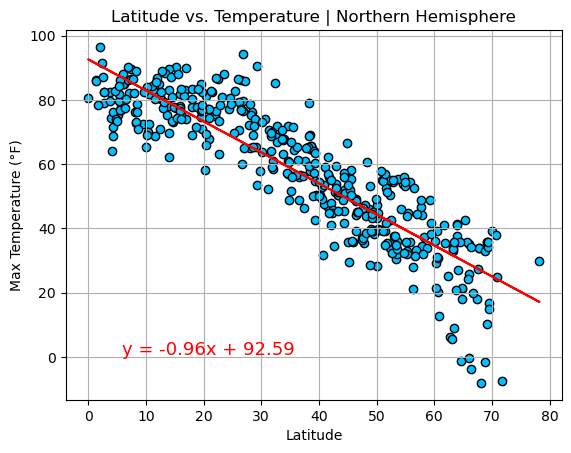

In [40]:
# Linear regression on Northern Hemisphere of Temp vs. Latitude
# using the previously define linear regression function
regress_values, line_eq = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# create scatter plot with this data
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],c='deepskyblue',edgecolors='black')

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Temperature | Northern Hemisphere')
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=13,color="r")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()


The r^2-value is: 0.4266974070054869.
The slope of the regression is: 0.5712212398476247.
The inercept of the regression is: 82.85406100085727.
The rvalue of the regression is: 0.6532207949885604.
The pvalue of the regression is: 4.9896645221553145e-23.
The Standard Deviation is: 12.777907552279212.
The Standard Error is: 0.0499091260185155.
The Standard Error of the mean is: 0.9604463457858019.
The regression line equation is: y = 0.57x + 82.85.



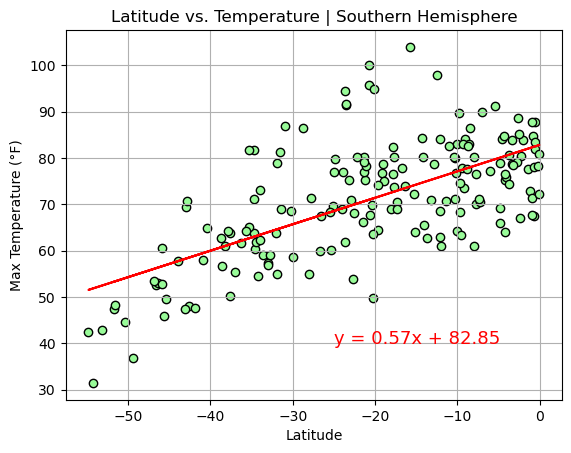

In [41]:
# Linear regression on Southern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# create scatter plot with this data
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],c='palegreen',edgecolors='black')

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Temperature | Southern Hemisphere')
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=13,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

## Discussion about the linear relationship between Latitude vs. Temperature ##
In the northern hemisphere, the regression line equation is y = -0.96x + 92.59.
The slope of the linear regression (-0.96)  tells us there is a negative correlation between latitude and temperature. Therefore, as the latitude increases, the temperature decreases. 
The y-intercept (92.59) shows that given a city with a latitude of 0, the maximum temperature is estimated to be 92.59°F.
The r^2 value is 0.7916618151816023, meaning the linear regression is a good fit given the data demonstrating a strong correlation between the variables.

In the southern hemisphere, the regression line equation is y = 0.57x + 82.85.
The slope of the linear regression (0.57)  tells us there is a moderately positive correlation between latitude and temperature. In other words, as the latitude increases, the temperature increases. 
The y-intercept (82.85) shows that given a city with a latitude of 0, the maximum temperature is estimated to be 82.85°F.
The r^2 value is 0.4266974070054869, meaning the linear regression demonstrates a moderate correlation between the variables.


The r^2-value is: 0.055762642386507806.
The slope of the regression is: 0.24395540403718757.
The inercept of the regression is: 64.41503146412865.
The rvalue of the regression is: 0.23614114928683608.
The pvalue of the regression is: 1.0781866851477134e-06.
The Standard Deviation is: 20.214851298227494.
The Standard Error is: 0.04927825395702175.
The Standard Error of the mean is: 0.9911146272503678.
The regression line equation is: y = 0.24x + 64.42.



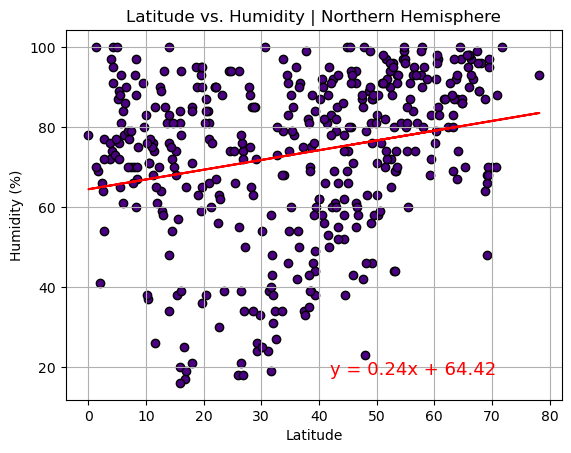

In [44]:
# Northern Hemisphere Humidity vs. Latitude Regression Plot
# using the previously define linear regression function
regress_values, line_eq = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# create scatter plot with this data
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],c='indigo',edgecolors='black')

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity | Northern Hemisphere')
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(42,18),fontsize=13,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


The r^2-value is: 0.011018569196597735.
The slope of the regression is: 0.15287313816123263.
The inercept of the regression is: 74.58708641061993.
The rvalue of the regression is: 0.10496937265982748.
The pvalue of the regression is: 0.16318028264724363.
The Standard Deviation is: 21.280605220853978.
The Standard Error is: 0.1091707550208614.
The Standard Error of the mean is: 1.5995482387751154.
The regression line equation is: y = 0.15x + 74.59.



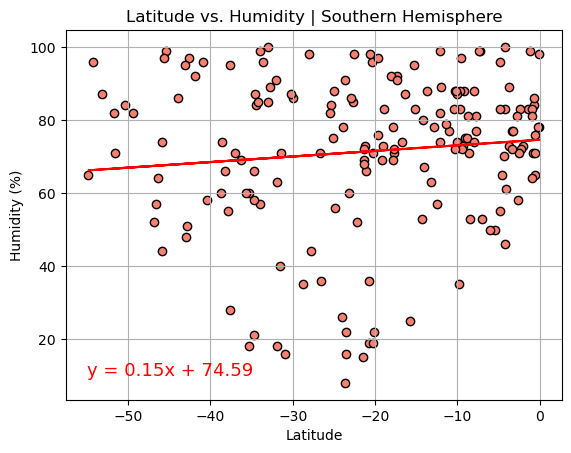

In [43]:
# Southern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# create scatter plot with this data
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],c='salmon',edgecolors='black')

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity | Southern Hemisphere')
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=13,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

## Discussion about the linear relationship between Latitude vs. Humidity ##
In the northern hemisphere, the regression line equation is y = 0.24x + 64.42.
The slope of the linear regression (0.24)  tells us there is a weak, but positive correlation between latitude and humidity. As latitude increases, humidity levels will tend to increase, but it is not guaranteed. 
The y-intercept (64.42) shows that given a city with a latitude of 0, the percentage of humidity is estimated to be 64.42%.
The r^2 value is 0.055762642386507806. With a r-value so close to 0, this shows that the linear regression is not a good fit, and there is a weak correlation between variables. 

In the southern hemisphere, the regression line equation is y = 0.15x + 74.59.
The slope of the linear regression (0.15)  shows a weak, but positive correlation between latitude and humidity. Just like in the other hemisphere, as latitude increases, humidity levels will tend to increase, but it is not guaranteed. 
The y-intercept (74.59) shows that given a city with a latitude of 0, the percentage of humidity is estimated to be 74.59%.
The r^2 value is 0.011018569196597735. With a r-value so close to 0, this shows that the linear regression is not a good fit, and there is a weak correlation between variables.

Overall, there is a weak, slightly positive correlation between latitude and humidity in either hemisphere. 


The r^2-value is: 0.026458902711423118.
The slope of the regression is: 0.3293914096342341.
The inercept of the regression is: 45.84655591020237.
The rvalue of the regression is: 0.1626619276641683.
The pvalue of the regression is: 0.0008563441930096022.
The Standard Deviation is: 39.62398355548145.
The Standard Error is: 0.09807977266870463.
The Standard Error of the mean is: 1.9427256284199959.
The regression line equation is: y = 0.33x + 45.85.



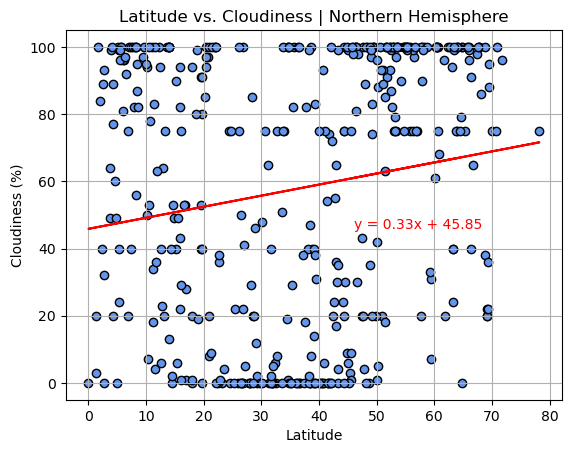

In [45]:
# Northern Hemisphere 
# using the previously define linear regression function
regress_values, line_eq = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# create scatter plot with this data
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],c='cornflowerblue',edgecolors='black')

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness | Northern Hemisphere')
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(46,46),fontsize=10,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()


The r^2-value is: 0.041432660986314415.
The slope of the regression is: 0.510920897052899.
The inercept of the regression is: 58.91159999423386.
The rvalue of the regression is: 0.20355014366566881.
The pvalue of the regression is: 0.006427134340591902.
The Standard Deviation is: 36.67732459403686.
The Standard Error is: 0.1852410493582453.
The Standard Error of the mean is: 2.756836534887827.
The regression line equation is: y = 0.51x + 58.91.



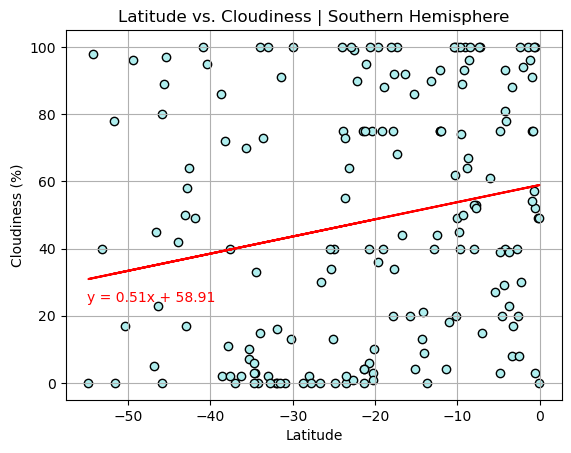

In [48]:
# Southern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# create scatter plot with this data
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],c='paleturquoise',edgecolors='black')

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness | Southern Hemisphere')
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,24),fontsize=10,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

## Discussion about the linear relationship between Latitude vs. Cloudiness ##
In the northern hemisphere, the regression line equation is y = 0.33x + 45.85.
The slope of the linear regression (0.33)  tells us there is a weak, but positive correlation between latitude and cloudiness. As latitude increases, the percentage of cloudiness will tend to increase, but it is not guaranteed. 
The y-intercept (45.85) shows that given a city with a latitude of 0, the percentage of cloudiness is estimated to be 45.85%. With a low r^2 value, this y-intercept value is a rough estimate and not a definitive percentage.
The r^2 value is 0.026458902711423118. With a r-value so close to 0, this shows that the linear regression is not a good fit, and there is a weak correlation between variables. 

In the southern hemisphere, the regression line equation is y = 0.51x + 58.91.
The slope of the linear regression (0.51)  tells us there is a weak, but positive correlation between latitude and cloudiness. As latitude increases, the percentage of cloudiness will tend to increase, but it is not guaranteed. 
The y-intercept (58.91) shows that given a city with a latitude of 0, the percentage of cloudiness is estimated to be 58.91%. With a low r^2 value, this y-intercept value is a rough estimate and not a definitive percentage.
The r^2 value is 0.041432660986314415. With a r-value so close to 0, this shows that the linear regression is not a good fit, and there is a weak correlation between variables. 


The r^2-value is: 0.007077277439344101.
The slope of the regression is: 0.027063195759089217.
The inercept of the regression is: 7.132346718319562.
The rvalue of the regression is: 0.08412655608869354.
The pvalue of the regression is: 0.08619886493357302.
The Standard Deviation is: 6.29473931301546.
The Standard Error is: 0.01573546730358478.
The Standard Error of the mean is: 0.3086249864427449.
The regression line equation is: y = 0.03x + 7.13.



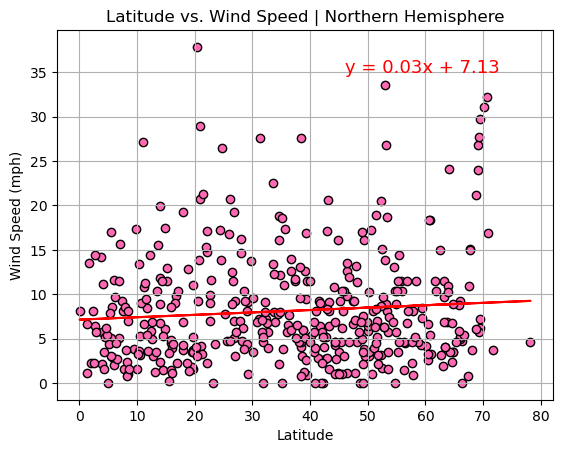

In [46]:
# Northern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# create scatter plot with this data
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],c='hotpink',edgecolors='black')

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed | Northern Hemisphere')
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(46,35),fontsize=13,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()


The r^2-value is: 0.0259020218109421.
The slope of the regression is: -0.058030983867063034.
The inercept of the regression is: 6.946755207127929.
The rvalue of the regression is: -0.16094105073268938.
The pvalue of the regression is: 0.03186469361011182.
The Standard Deviation is: 5.268760984180309.
The Standard Error is: 0.026824898565565605.
The Standard Error of the mean is: 0.39602432662554043.
The regression line equation is: y = -0.06x + 6.95.



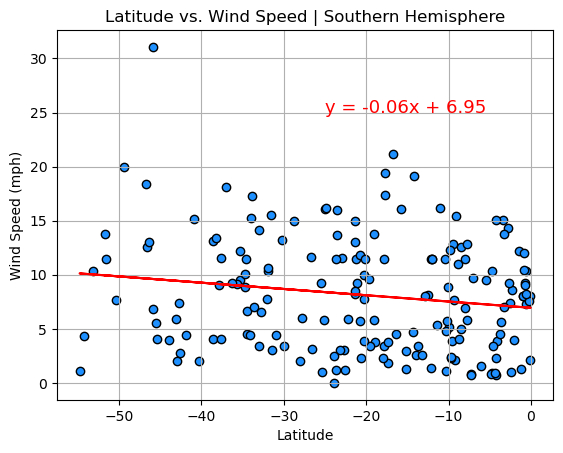

In [49]:
# Southern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# create scatter plot with this data
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],c='dodgerblue',edgecolors='black')

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed | Southern Hemisphere')
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=13,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

## Discussion about the linear relationship between Latitude vs. Wind Speed ##
In the northern hemisphere, the regression line equation is y = 0.03x + 7.13.
The slope of the linear regression (0.03)  tells us there is a severely weak positive correlation between latitude and wind speed. As latitude increases, the wind speed might increase, but it is not guaranteed. 
The y-intercept (7.13) shows that given a city with a latitude of 0, the wind speed is estimated to be 7.13 MPH. With a low r^2 value, this y-intercept value is not significant.
The r^2 value is 0.007077277439344101. With a r-value so close to 0, this shows that the linear regression is not a good fit, and there is no correlation between variables. 

In the southern hemisphere, the regression line equation is y = -0.06x + 6.95.
The slope of the linear regression (-0.06)  tells us there is a very weak negative correlation between latitude and wind speed. As latitude increases, the wind speed decreases, but not guaranteed. 
The y-intercept (6.95) shows that given a city with a latitude of 0, the wind speed is estimated to be 6.95. With a low r^2 value, this y-intercept value is not significant. 
The r^2 value is 0.0259020218109421. With a r-value so close to 0, this shows that the linear regression is not a good fit, and there is a weak correlation between variables. 